<a href="https://colab.research.google.com/github/Syed-Irfan-1165/ML-Regression/blob/master/Yes_Bank_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Summary

##Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.


## <b>Data Description </b>


1.   Date - Date of record
2.   Open - Opening Price
3.   High - Highest price in the day
4.   Low - Lowest price in the day
5.   Close - Occupations of the speaker

# **Data Preparation**

## **Importing and Inspecting Dataset**

In [3]:
#Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Mounting the Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Importing csv file

YesBank_df = pd.read_csv(r"/content/drive/MyDrive/Linear Regression/data_YesBank_StockPrices.csv")

In [6]:
YesBank_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [7]:
YesBank_df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [8]:
YesBank_df.shape

(185, 5)

In [9]:
YesBank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
YesBank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [11]:
YesBank_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


# **Exploratory Data Analysis**

## **Handling Outliers**

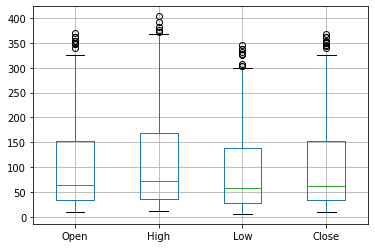

In [12]:
YesBank_df.boxplot()



##**Cleaning and Manipulating dataset**

In [13]:
YesBank_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Text(0.5, 15.0, 'Variables')

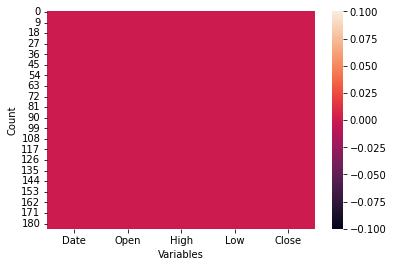

In [14]:
#plotting the heatmap for checking the null values
data = YesBank_df.isnull()
heat_map = sns.heatmap(data)
plt.ylabel('Count')
plt.xlabel('Variables')

In [15]:
duplicate = YesBank_df[YesBank_df.duplicated()]
print("Duplicate Values :")

Duplicate Values :


In [16]:
#Writing a define function to obtain variable, dtypes,count,unique,duplicate,missing values in a single dataframe
def show_missing(df):
   
    
    variables = []
    dtypes = []
    count = []
    unique = []
    duplicate = []
    missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        duplicate.append(df.duplicated().sum())
        missing.append(df[item].isna().sum())
        

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'duplicate' : duplicate,
        'missing': missing, 
        
    })    
        
    return output

In [17]:
show_missing(YesBank_df).T

,0,1,2,3,4
variable,Date,Open,High,Low,Close
dtype,object,float64,float64,float64,float64
count,185,185,185,185,185
unique,185,183,184,183,185
duplicate,0,0,0,0,0
missing,0,0,0,0,0


In [18]:
YesBank_df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [19]:
# convert string object to datetime object

from datetime import datetime
YesBank_df['Date'] = YesBank_df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

In [20]:
# For better visualization let me create seperate columns for month,year from date

YesBank_df['Month'] = YesBank_df['Date'].apply(lambda x: x.strftime('%B')) 
YesBank_df['Year'] = YesBank_df['Date'].apply(lambda x: x.strftime('%Y')) 
YesBank_df['Day'] = pd.to_datetime(YesBank_df['Date']).dt.day_name()

In [21]:
YesBank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
 5   Month   185 non-null    object        
 6   Year    185 non-null    object        
 7   Day     185 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 11.7+ KB


In [22]:
YesBank_df

,Date,Open,High,Low,Close,Month,Year,Day
0,2005-07-01,13.00,14.00,11.25,12.46,July,2005,Friday
1,2005-08-01,12.58,14.88,12.55,13.42,August,2005,Monday
2,2005-09-01,13.48,14.87,12.27,13.30,September,2005,Thursday
3,2005-10-01,13.20,14.47,12.40,12.99,October,2005,Saturday
4,2005-11-01,13.35,13.88,12.88,13.41,November,2005,Tuesday
...,...,...,...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95,July,2020,Wednesday
181,2020-08-01,12.00,17.16,11.85,14.37,August,2020,Saturday
182,2020-09-01,14.30,15.34,12.75,13.15,September,2020,Tuesday
183,2020-10-01,13.30,14.01,12.11,12.42,October,2020,Thursday


##Data Visualization

Text(0.5, 6.79999999999999, 'Closing Price')

<Figure size 1080x720 with 0 Axes>

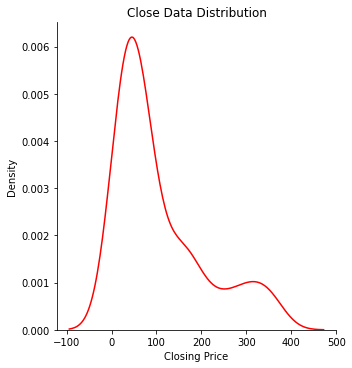

In [23]:
# Dependent variable 'Closing price'
plt.figure(figsize=(15,10))
sns.displot(YesBank_df['Close'],color="r",kind ='kde')
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')

In [24]:
# visualise the data
import plotly.express as px

fig = px.strip(YesBank_df, YesBank_df['Month'], YesBank_df['Close'], title='Monthly closing price')
autosize=False,
width=1400,
height=400
fig.show()
     

In [25]:
fig = px.bar(YesBank_df, YesBank_df['Year'], YesBank_df['Close'], title='Yearly closing price')
autosize=False,
width=1400,
height=400
fig.show()

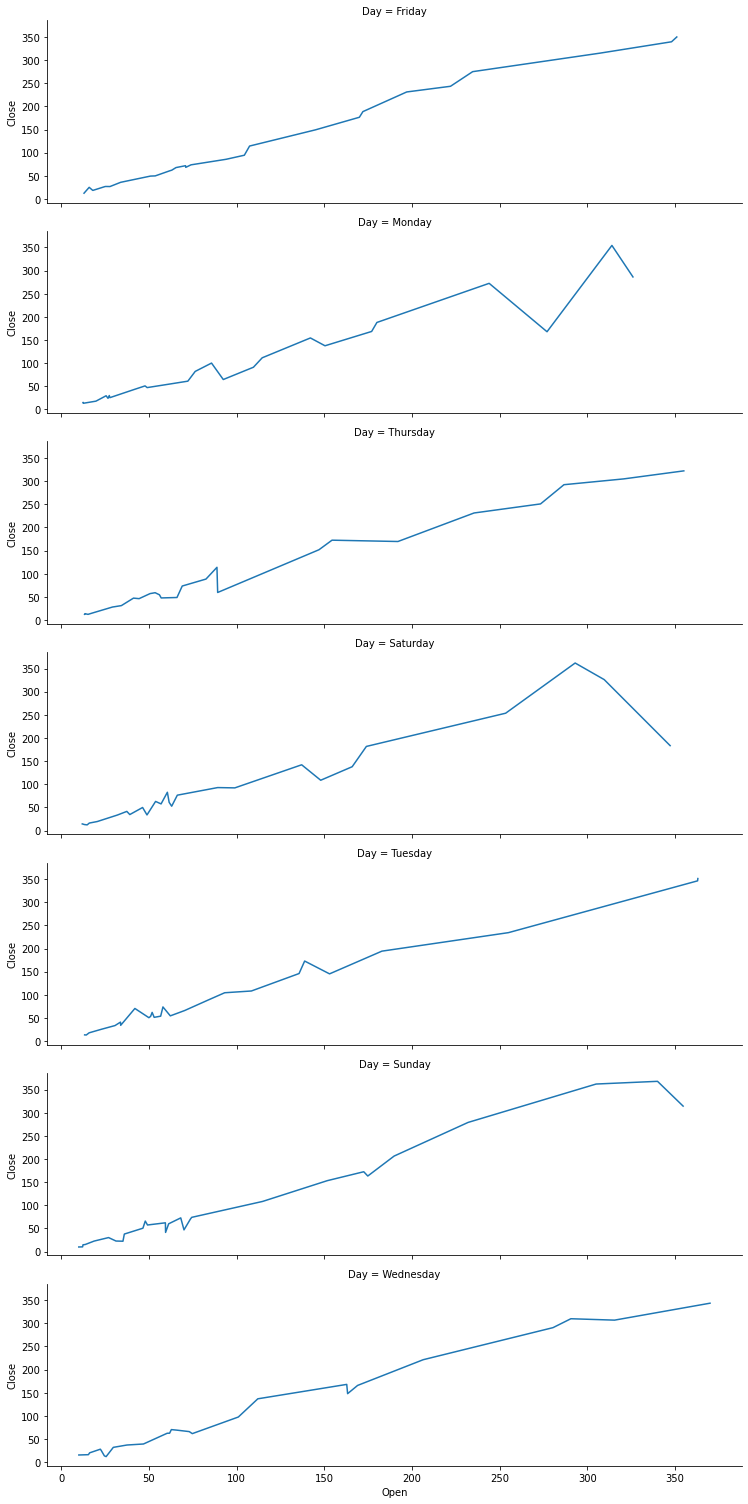

In [26]:
sns.relplot(data=YesBank_df, x="Open", y="Close",
    row="Day",
    height=3, aspect=3.5,
    kind="line"
)

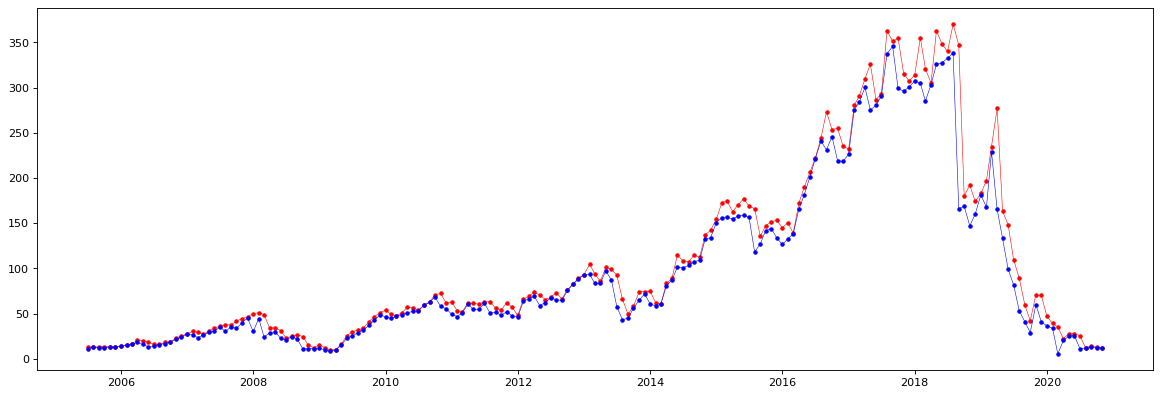

In [32]:
fig = plt.figure(figsize=(18, 6), dpi=80)
plt.plot( 'Date', 'Open', data=YesBank_df, marker='.', color='red', linewidth=0.5)
# plt.plot( 'Date', 'High', data=YesBank_df, marker='o', color='red', linewidth=1)
plt.plot( 'Date', 'Low', data=YesBank_df, marker='.', color='blue', linewidth=0.5)
#plt.plot( 'Date', 'Close', data=YesBank_df, marker='.', color='black', linewidth=0.5)


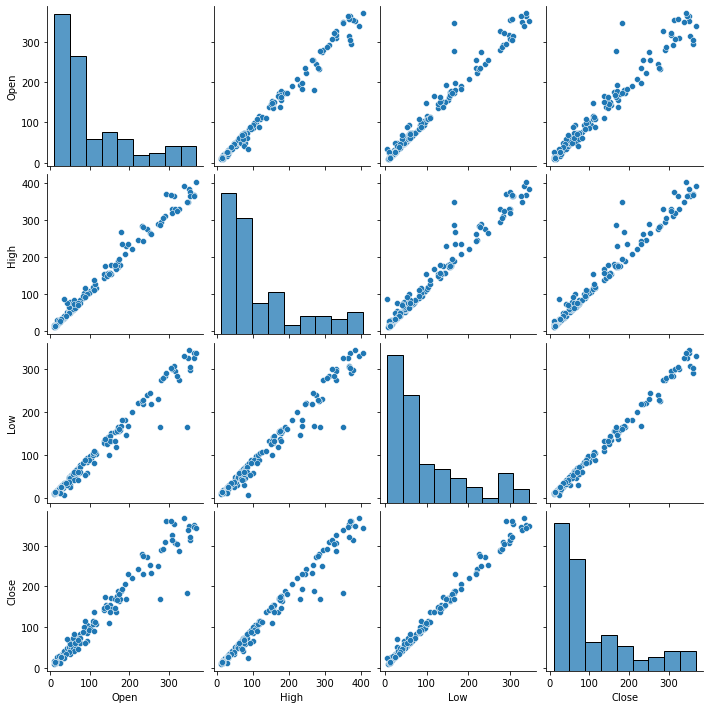

In [47]:
cols = ['Open', 'High', 'Low', 'Close',]
sns.pairplot(YesBank_df[cols], height = 2.5)

In [33]:
YesBank_df.skew(axis = 1, skipna = True)

<ipython-input-33-9e4256bf65e3>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



0     -0.253807
1      1.296154
2      0.495575
3      1.088047
4      0.000000
         ...   
180    0.069940
181    0.961512
182    0.535863
183    0.441802
184    0.005410
Length: 185, dtype: float64

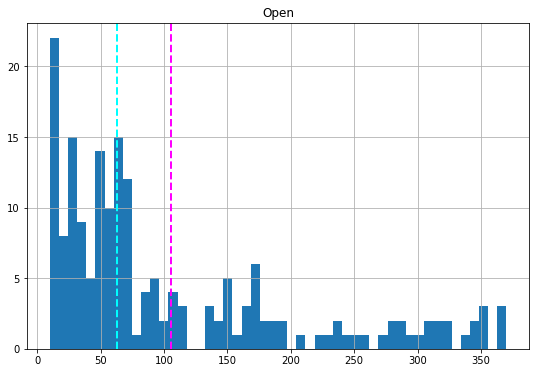

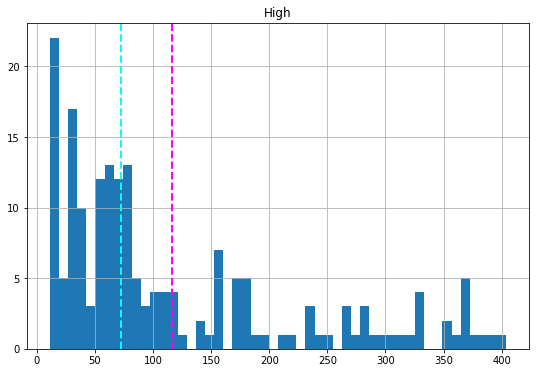

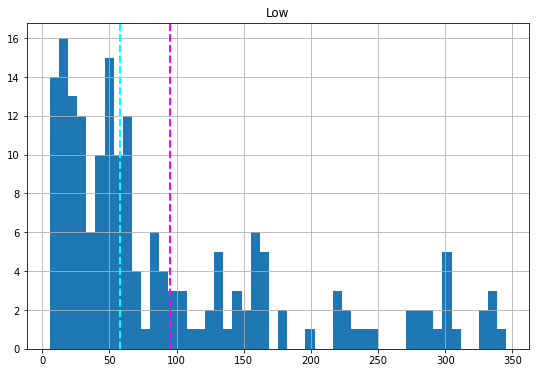

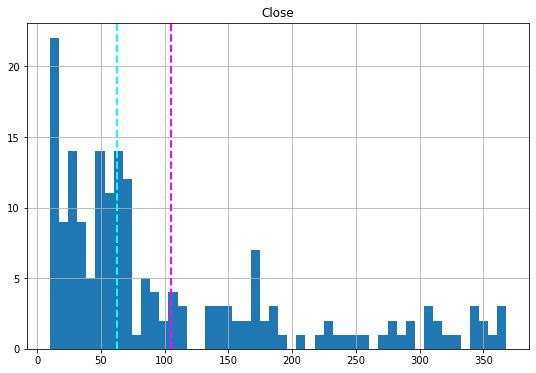

In [28]:
# Check for skewness in the dataset
numeric_features = YesBank_df.describe().columns
for col in numeric_features[0:4]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = YesBank_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [66]:
#Plotting Open vs Close vs High 3d plot for better visualization
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(YesBank_df, x='Date', y='Open', z='Close',
              color='High')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()




#**Model building**

##**Conclusion**